In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime as dt
import datetime

In [2]:
P=pd.read_csv("../Dataset/final_dataset_LL.csv")
P.head()


,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,27-08-2005,Alaves,Barcelona,0,0,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,17
1,1,27-08-2005,Ath Bilbao,Sociedad,3,0,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-5
2,2,27-08-2005,Valencia,Betis,1,0,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-11
3,3,28-08-2005,Ath Madrid,Zaragoza,0,0,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-1
4,4,28-08-2005,Cadiz,Real Madrid,1,2,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,17


In [69]:
P.columns

Index(['FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD',
       'ATGD', 'DiffFormPts', 'DiffLP'],
      dtype='object')

In [65]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder

# Charger les données
data = P
data=data.dropna(axis=0)

# Séparer les fonctionnalités et la variable cible
X = data.drop(['FTR'], axis=1)
y = data['FTR']

# Effectuer l'encodage one-hot pour les fonctionnalités catégorielles
categorical_features = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Créer un objet de sélection des K meilleures fonctionnalités
selector = SelectKBest(score_func=f_classif, k=24)  # Sélectionner les 5 meilleures fonctionnalités

# Appliquer la sélection des fonctionnalités
X_new = selector.fit_transform(X_encoded, y)

# Obtenir les indices des fonctionnalités sélectionnées
selected_features = selector.get_support(indices=True)

# Obtenir les noms des fonctionnalités sélectionnées
selected_feature_names = X_encoded.columns[selected_features]

# Afficher les fonctionnalités sélectionnées
print("Fonctionnalités sélectionnées:")
for feature in selected_feature_names:
    print(feature)



Fonctionnalités sélectionnées:
HTP
ATP
HTGD
ATGD
DiffFormPts
DiffLP
HM1_D
HM1_L
HM1_M
HM1_W
HM2_L
HM2_W
HM3_L
HM3_M
HM3_W
AM1_L
AM1_M
AM1_W
AM2_L
AM2_W
AM3_D
AM3_L
AM3_M
AM3_W


In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score

# Supposons que votre DataFrame s'appelle P et que la variable cible s'appelle 'target'

# Sélectionner les colonnes de type chaîne de caractères
categorical_features = P.select_dtypes(include=['object']).columns

# Encoder les variables catégorielles en utilisant LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
    P[feature] = label_encoder.fit_transform(P[feature])

# Séparer les données en ensemble d'entraînement et ensemble de test
X = P.drop('FTR', axis=1)
y = P['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet DMatrix pour les données d'entraînement et de test
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Définir les paramètres du modèle XGBoost
params = {
    'objective': 'binary:logitraw',
    'eval_metric': 'auc',
    'max_depth': 2,
    'eta': 0.1,
    'gamma': 0.1,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'min_child_weight': 1,
}

# Entraîner le modèle XGBoost
model = xgb.train(params, dtrain, num_boost_round=150)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(dtest)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
precis=precision_score(y_test,y_pred)
print("Exactitude : %.2f%%" % (accuracy * 100))
print(precis)


Exactitude : 65.88%
0.7351129363449692


In [15]:
derniere_ligne=P.iloc[-1]
df_nouveau = pd.DataFrame(columns=P.columns)
df_nouveau
df_nouveau = df_nouveau.append(derniere_ligne, ignore_index=True)
df_nouveau

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,H,1.529412,1.352941,W,L,D,W,L,W,0.088235,-0.058824,-0.058824,-5


In [69]:
derniere_ligne=P.iloc[-59]

df_nouveau = pd.DataFrame(columns=P.columns)
# Ajouter la dernière ligne au nouveau DataFrame en conservant les types de données
df_nouveau = df_nouveau.append(derniere_ligne, ignore_index=True)
categorical_features = df_nouveau.select_dtypes(include=['object']).columns
for feature in categorical_features:
    df_nouveau[feature] = label_encoder.transform(df_nouveau[feature])
X = df_nouveau.drop('FTR', axis=1)
y=model.predict( xgb.DMatrix(X))


In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supposons que votre DataFrame s'appelle P et que la variable cible s'appelle 'target'

# Sélectionner les colonnes de type chaîne de caractères
categorical_features = P.select_dtypes(include=['object']).columns

# Encoder les variables catégorielles en utilisant LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
    P[feature] = label_encoder.fit_transform(P[feature])

# Séparer les données en ensemble d'entraînement et ensemble de test
X = P.drop('FTR', axis=1)
y = P['FTR']
# Charger les données d'entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle GBC
model = GradientBoostingClassifier(n_estimators=550, learning_rate=0.1, max_depth=1, random_state=2)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
precis=precision_score(y_test, y_pred)
print("Exactitude : %.2f%%" % (accuracy * 100))
print(precis)

Exactitude : 66.69%
0.6587301587301587


In [112]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categorical_features = P.select_dtypes(include=['object']).columns

# Encoder les variables catégorielles en utilisant LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
    P[feature] = label_encoder.fit_transform(P[feature])

# Séparer les données en ensemble d'entraînement et ensemble de test
X = P.drop('FTR', axis=1)
y = P['FTR']
# Charger les données d'entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

# Créer les modèles individuels
model= RandomForestClassifier(bootstrap=True, max_depth=20, max_features='sqrt', min_samples_leaf=4, min_samples_split= 2, n_estimators= 500)
model.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
precis=precision_score(y_test, y_pred)
print("Exactitude : %.2f%%" % (accuracy * 100))
print(precis)


Exactitude : 66.18%
0.6555407209612817


In [120]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

categorical_features = P.select_dtypes(include=['object']).columns

# Encoder les variables catégorielles en utilisant LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
    P[feature] = label_encoder.fit_transform(P[feature])

# Séparer les données en ensemble d'entraînement et ensemble de test
X = P.drop('FTR', axis=1)
y = P['FTR']
# Charger les données d'entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

# Créer le modèle séquentiel
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

# Évaluer le modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print("Perte :", loss)
print("Exactitude :", accuracy)

Train on 6700 samples
Epoch 1/200
6700/6700 [==============================] - 0s 62us/sample - loss: 0.6198 - accuracy: 0.6610
Epoch 2/200
6700/6700 [==============================] - 0s 41us/sample - loss: 0.6073 - accuracy: 0.6696
Epoch 3/200
6700/6700 [==============================] - 0s 64us/sample - loss: 0.6043 - accuracy: 0.6700
Epoch 4/200
6700/6700 [==============================] - 0s 59us/sample - loss: 0.6021 - accuracy: 0.6719
Epoch 5/200
6700/6700 [==============================] - 0s 57us/sample - loss: 0.6030 - accuracy: 0.6715
Epoch 6/200
6700/6700 [==============================] - 0s 52us/sample - loss: 0.6008 - accuracy: 0.6766
Epoch 7/200
6700/6700 [==============================] - 0s 44us/sample - loss: 0.5990 - accuracy: 0.6785
Epoch 8/200
6700/6700 [==============================] - 0s 38us/sample - loss: 0.5980 - accuracy: 0.6801
Epoch 9/200
6700/6700 [==============================] - 0s 59us/sample - loss: 0.5989 - accuracy: 0.6782
Epoch 10/200
6700/6700 [

In [70]:
df_nouveau

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,1.0,1.62069,1.0,3.0,3.0,3.0,0.0,1.0,1.0,0.37931,-0.827586,0.275862,-11.0


In [8]:
data=P.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
            'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
            'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
            'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)

c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


KeyError: "['Unnamed: 0' 'HomeTeam' 'AwayTeam' 'Date' 'MW' 'HTFormPtsStr'\n 'ATFormPtsStr' 'FTHG' 'FTAG' 'HTGS' 'ATGS' 'HTGC' 'ATGC' 'HomeTeamLP'\n 'AwayTeamLP' 'DiffPts' 'HTFormPts' 'ATFormPts' 'HM4' 'HM5' 'AM4' 'AM5'\n 'HTLossStreak5' 'ATLossStreak5' 'HTWinStreak5' 'ATWinStreak5'\n 'HTWinStreak3' 'HTLossStreak3' 'ATWinStreak3' 'ATLossStreak3'] not found in axis"

In [137]:
P.head(20)

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,1,0.0,0.0,2,2,2,2,2,2,0.0,0.0,0.0,17
1,0,0.0,0.0,2,2,2,2,2,2,0.0,0.0,0.0,-5
2,0,0.0,0.0,2,2,2,2,2,2,0.0,0.0,0.0,-11
3,1,0.0,0.0,2,2,2,2,2,2,0.0,0.0,0.0,-1
4,1,0.0,0.0,2,2,2,2,2,2,0.0,0.0,0.0,17
5,0,0.0,0.0,2,2,2,2,2,2,0.0,0.0,0.0,-14
6,1,0.0,0.0,2,2,2,2,2,2,0.0,0.0,0.0,6
7,1,0.0,0.0,2,2,2,2,2,2,0.0,0.0,0.0,5
8,0,0.0,0.0,2,2,2,2,2,2,0.0,0.0,0.0,-3
9,0,0.0,0.0,2,2,2,2,2,2,0.0,0.0,0.0,-11


In [45]:
P.dtypes

FTR             object
HTP            float64
ATP            float64
HM1             object
HM2             object
HM3             object
AM1             object
AM2             object
AM3             object
HTGD           float64
ATGD           float64
DiffFormPts    float64
DiffLP           int64
dtype: object

In [46]:
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == 'object':
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output


In [138]:
derniere_ligne=P.iloc[-1]
df_nouveau = pd.DataFrame(columns=P.columns)
# Ajouter la dernière ligne au nouveau DataFrame en conservant les types de données
df_nouveau = df_nouveau.append(derniere_ligne, ignore_index=True)


In [139]:
df_nouveau

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,0.0,1.529412,1.352941,3.0,1.0,0.0,3.0,1.0,3.0,0.088235,-0.058824,-0.058824,-5.0


In [48]:
preprocess_features(a)

,FTR_H,HTP_0.8571428571428571,ATP_0.6857142857142857,HM1_L,HM2_W,HM3_L,AM1_L,AM2_L,AM3_D,HTGD_-0.9142857142857144,ATGD_-0.9142857142857144,DiffFormPts_0.0571428571428571,DiffLP_-4
7472,1,1,1,1,1,1,1,1,1,1,1,1,1


In [43]:
P.columns

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP',
       'AwayTeamLP', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts',
       'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP'],
      dtype='object')

In [46]:
P.groupby("FTR").count()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
FTR,,,,,,,,,,,,,,,,,,,,,
H,3450,3450,3450,3450,3450,3450,3450,3450,3450,3450,...,3450,3450,3450,3450,3450,3450,3450,3450,3450,3450
NH,4023,4023,4023,4023,4023,4023,4022,4022,4022,4022,...,4023,4023,4023,4023,4023,4023,4022,4023,4023,4023


In [7]:
def read_data(leaguename,leaguecode):
    
    pathlist=[]
    
    
    for i in range(31,0,-1):
            
        sales = leaguename+'/'+leaguecode+' ('+str(i)+')'+'.csv'
          
        if(os.path.isfile(sales)):
                pathlist.append(sales)
    
    sales1 = leaguename+'/'+leaguecode+'.csv'
    if(os.path.isfile(sales1)):
        pathlist.append(sales1)
    return pathlist

In [10]:
premleague=read_data("../premierleague","E0")
ligue1=read_data("../ligue1","F1")
laliga=read_data("../laliga","SP1")
bundesliga=read_data("../bundesligua","D1")
serieA=read_data("../serieA","I1")

In [11]:
print(premleague)
print(ligue1)
print(laliga)
print(bundesliga)
print(serieA)

['../premierleague/E0 (19).csv', '../premierleague/E0 (18).csv', '../premierleague/E0 (17).csv', '../premierleague/E0 (16).csv', '../premierleague/E0 (15).csv', '../premierleague/E0 (14).csv', '../premierleague/E0 (13).csv', '../premierleague/E0 (12).csv', '../premierleague/E0 (11).csv', '../premierleague/E0 (10).csv', '../premierleague/E0 (9).csv', '../premierleague/E0 (8).csv', '../premierleague/E0 (7).csv', '../premierleague/E0 (6).csv', '../premierleague/E0 (5).csv', '../premierleague/E0 (4).csv', '../premierleague/E0 (3).csv', '../premierleague/E0 (2).csv', '../premierleague/E0 (1).csv', '../premierleague/E0.csv']
['../ligue1/F1 (17).csv', '../ligue1/F1 (16).csv', '../ligue1/F1 (15).csv', '../ligue1/F1 (14).csv', '../ligue1/F1 (13).csv', '../ligue1/F1 (12).csv', '../ligue1/F1 (11).csv', '../ligue1/F1 (10).csv', '../ligue1/F1 (9).csv', '../ligue1/F1 (8).csv', '../ligue1/F1 (7).csv', '../ligue1/F1 (6).csv', '../ligue1/F1 (5).csv', '../ligue1/F1 (4).csv', '../ligue1/F1 (3).csv', '../

In [12]:
def drop(filename):
    with open(filename, 'r') as f:
       lines = f.readlines()

    for i, line in enumerate(lines):
        # Split the line into fields
        fields = line.strip().split(',')
    

        # Check if the number of fields in the line is as expected
        if len(fields) != 57:
            
            # Option 2: Fix the line by removing or adding fields
            fields = fields[:57] if len(fields) > 57 else fields + [''] * (57 - len(fields))

In [22]:
def merge_data(list):
    dfs=[]
    for filename in list:
        drop(filename)
        df= pd.read_csv(filename)
        dfs.append(df)
    merged_df = pd.concat(dfs, axis=0, ignore_index=True)
    
    return merged_df

def change(date):
    date=str(date)
    if len(date)<=8:
         date=date[:6]+'20'+date[6:]
    return date

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def missing_data_analysis(dataframe):
    # Calcul du nombre de données manquantes par colonne
    missing_counts = dataframe.isnull().sum()
    
    # Calcul du pourcentage de données manquantes par colonne
    missing_percentages = (missing_counts / len(dataframe)) * 100
    
    # Création d'un DataFrame pour stocker les résultats
    missing_data_df = pd.DataFrame({'Missing_Count': missing_counts, 'Missing_Percentage': missing_percentages})
    missing_data_df.sort_values(by='Missing_Count', ascending=False, inplace=True)
    missing_data_df=missing_data_df[missing_data_df['Missing_Percentage'] > 50]
    # Affichage des résultats
    print("Nombre de données manquantes par colonne:")
    print(missing_data_df)
    
    # Tracé de l'histogramme des données manquantes
    missing_data_df.plot(kind='bar', y='Missing_Percentage', figsize=(14, 14))
    plt.title("Pourcentage de données manquantes par colonne")
    plt.xlabel("Colonnes")
    plt.ylabel("Pourcentage de données manquantes")
    plt.xticks(rotation=90)
    plt.show()
    plt.savefig("save_path.png")


In [24]:
premleaguedata=merge_data(premleague)
premleaguedata

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,E0,07/05/2023,Newcastle,Arsenal,0.0,2.0,A,0.0,1.0,A,...,2.31,-0.25,1.98,1.92,2.02,1.91,2.10,1.96,2.00,1.87
7470,E0,07/05/2023,West Ham,Man United,1.0,0.0,H,1.0,0.0,H,...,2.13,0.50,1.86,2.04,1.88,2.05,1.89,2.10,1.83,2.04
7471,E0,08/05/2023,Fulham,Leicester,5.0,3.0,H,3.0,0.0,H,...,1.86,0.00,1.97,1.93,1.96,1.96,1.99,2.01,1.92,1.94
7472,E0,08/05/2023,Brighton,Everton,1.0,5.0,A,0.0,3.0,A,...,2.62,-1.50,1.94,1.96,2.00,1.93,2.01,2.02,1.94,1.92


Nombre de données manquantes par colonne:
        Missing_Count  Missing_Percentage
IWCH             5704           76.317902
IWCD             5704           76.317902
IWCA             5704           76.317902
PC<2.5           5703           76.304522
P<2.5            5703           76.304522
...               ...                 ...
GBD              4435           59.339042
GBA              4435           59.339042
SJD              4015           53.719561
SJH              4015           53.719561
SJA              4015           53.719561

[74 rows x 2 columns]


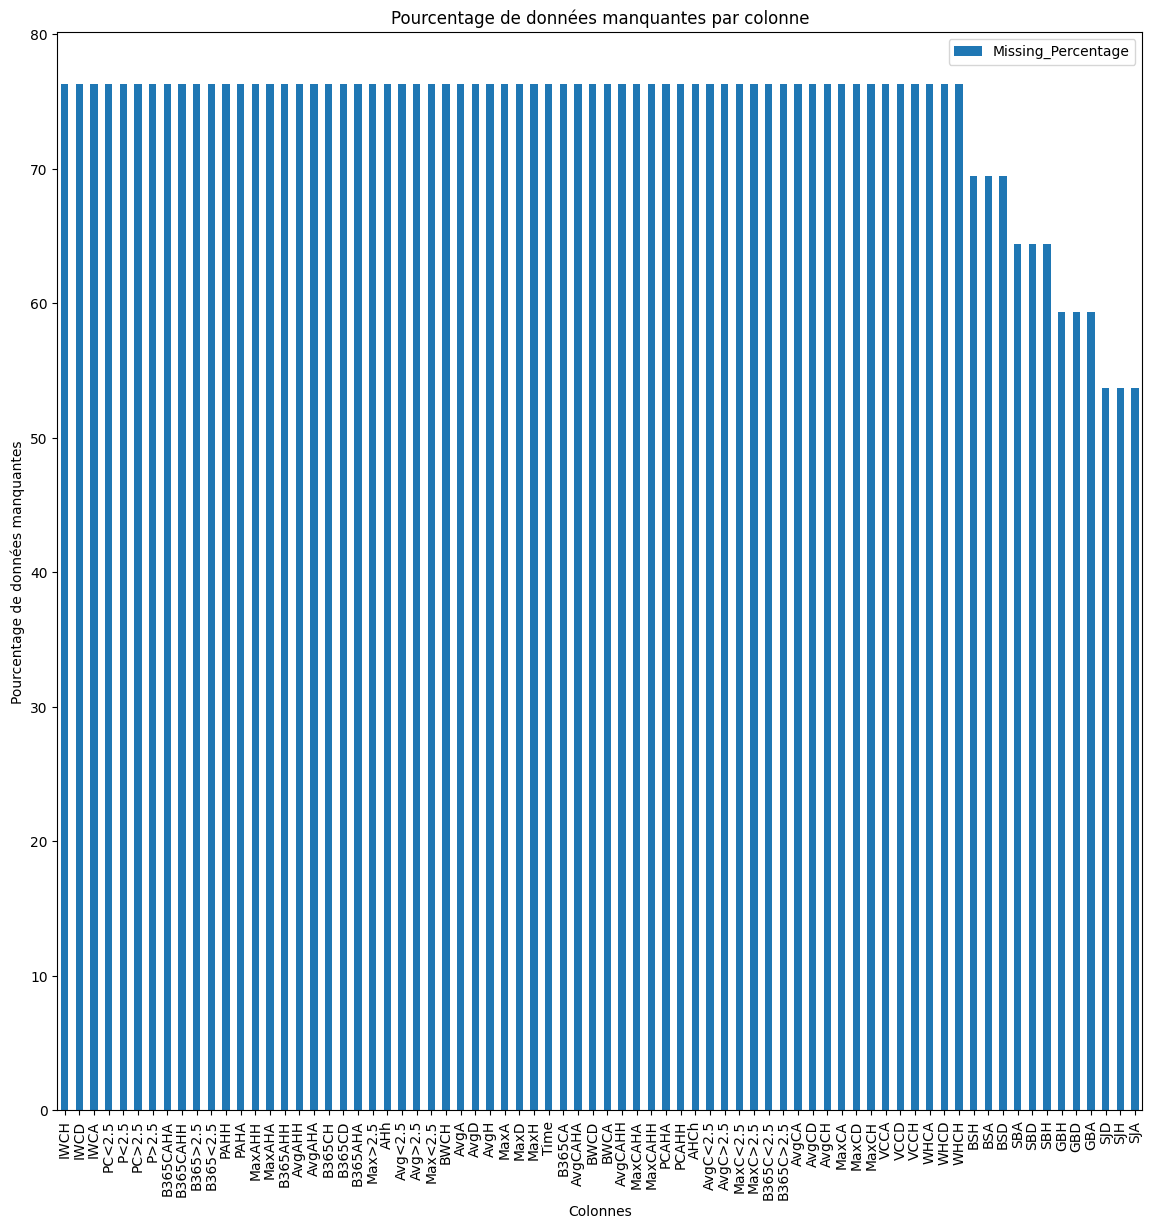

<Figure size 640x480 with 0 Axes>

In [40]:

missing_data_analysis(premleaguedata)

In [8]:
def preprocess(df):
    miss_values=df.isna().mean()*100
   
    keep=miss_values[miss_values<=10].index
    df=df[keep]
    return df
    
def merge_data(list):
    dfs=[]
    for filename in list:
        df= pd.read_csv(filename)
        df.set_index
        df=df.dropna(subset=["HomeTeam"])
        df=df.dropna(subset=["AwayTeam"])
        a=df.isna().sum().value_counts
        df.Date=df.Date.apply(change)
        df.Date=df.Date.apply(lambda x:x.replace("/","-"))
        dfs.append(df)
    
    merged_df = pd.concat(dfs, axis=0)
    merged_df=preprocess(merged_df)
    
    return merged_df


In [9]:
premleaguedata=merge_data(premleague)
ligue1data=merge_data(ligue1)
laligadata=merge_data(laliga)
bundesligadata=merge_data(bundesliga)
serieAdata=merge_data(serieA)


In [10]:
premleaguedata.shape

(7126, 38)

In [11]:
premleaguedata.to_csv("datapremiereleague.csv", index = False)
ligue1data.to_csv("dataligue1.csv",index=False)
laligadata.to_csv("datalaliga.csv",index=False)
bundesligadata.to_csv("databundesliga.csv",index=False)
serieAdata.to_csv("dataserieA.csv",index=False)

In [54]:
u={}
teams=premleaguedata.HomeTeam.unique()
print(teams)
for i in range(len(teams)):
   u[teams[i]]=0
print(teams)

for i in range(len(premleaguedata)):
   if premleaguedata.iloc[i]['FTR']=='H':
      u[premleaguedata.iloc[i].HomeTeam]=u[premleaguedata.iloc[i].HomeTeam]+3
   elif premleaguedata.iloc[i]['FTR']=='A':
      u[premleaguedata.iloc[i].AwayTeam]=u[premleaguedata.iloc[i].AwayTeam]+3
   else :
       u[premleaguedata.iloc[i].HomeTeam]=u[premleaguedata.iloc[i].HomeTeam]+1
       u[premleaguedata.iloc[i].AwayTeam]=u[premleaguedata.iloc[i].AwayTeam]+1
print(u)     
      

['Aston Villa' 'Everton' 'Fulham' 'Man City' 'Middlesbrough' 'Portsmouth'
 'Sunderland' 'West Ham' 'Arsenal' 'Wigan' 'Birmingham' 'Blackburn'
 'Charlton' 'Liverpool' 'Man United' 'Newcastle' 'Tottenham' 'West Brom'
 'Bolton' 'Chelsea' 'Reading' 'Sheffield United' 'Watford' 'Derby' 'Hull'
 'Stoke' 'Wolves' 'Burnley' 'Blackpool' 'QPR' 'Swansea' 'Norwich'
 'Southampton' 'Crystal Palace' 'Cardiff' 'Leicester' 'Bournemouth'
 'Brighton' 'Huddersfield' 'Leeds' 'Brentford' "Nott'm Forest"]
['Aston Villa' 'Everton' 'Fulham' 'Man City' 'Middlesbrough' 'Portsmouth'
 'Sunderland' 'West Ham' 'Arsenal' 'Wigan' 'Birmingham' 'Blackburn'
 'Charlton' 'Liverpool' 'Man United' 'Newcastle' 'Tottenham' 'West Brom'
 'Bolton' 'Chelsea' 'Reading' 'Sheffield United' 'Watford' 'Derby' 'Hull'
 'Stoke' 'Wolves' 'Burnley' 'Blackpool' 'QPR' 'Swansea' 'Norwich'
 'Southampton' 'Crystal Palace' 'Cardiff' 'Leicester' 'Bournemouth'
 'Brighton' 'Huddersfield' 'Leeds' 'Brentford' "Nott'm Forest"]
{'Aston Villa': 677, 'Ever

In [55]:
u=dict(sorted(u.items(), key=lambda x: x[1], reverse=True))

In [56]:
print(u)

{'Chelsea': 1431, 'Man United': 1428, 'Man City': 1404, 'Liverpool': 1379, 'Arsenal': 1342, 'Tottenham': 1260, 'Everton': 1035, 'West Ham': 830, 'Newcastle': 735, 'Aston Villa': 677, 'Southampton': 545, 'Leicester': 514, 'Stoke': 501, 'Fulham': 491, 'West Brom': 475, 'Crystal Palace': 475, 'Sunderland': 428, 'Burnley': 365, 'Swansea': 353, 'Wolves': 343, 'Blackburn': 338, 'Wigan': 331, 'Bolton': 311, 'Watford': 301, 'Bournemouth': 284, 'Brighton': 255, 'Middlesbrough': 221, 'Portsmouth': 218, 'Hull': 205, 'Norwich': 201, 'Birmingham': 158, 'Leeds': 126, 'Reading': 119, 'Sheffield United': 115, 'QPR': 92, 'Brentford': 89, 'Charlton': 81, 'Cardiff': 64, 'Huddersfield': 53, 'Blackpool': 39, "Nott'm Forest": 27, 'Derby': 11}


In [57]:

noms_equipes = list(u.keys())
points = list(u.values())

# Création du dataframe
df = pd.DataFrame({'Points': points}, index=noms_equipes)
df.index.name = 'Equipe'
df.reset_index(inplace=True)
df.index += 1
df.index.name = 'Classement'

,Equipe,Points
Classement,,
1,Chelsea,1431
2,Man United,1428
3,Man City,1404
4,Liverpool,1379
5,Arsenal,1342


In [12]:
# Gets the goals scored agg arranged by teams and matchweek
def get_goals_scored(playing_stat):
    # Créer un dictionnaire avec les noms d'équipe comme clés
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        if i != 'nan': # Vérifier que le nom de l'équipe n'est pas NaN
            teams[i] = []
    
    # La valeur correspondant aux clés est une liste contenant les buts marqués par match.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)        
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    max_length = max([len(team) for team in teams.values()])
    for team, goals_scored in teams.items():
        if len(goals_scored) < max_length:
            goals_scored += [float('nan')] * (max_length - len(goals_scored))

    # Create the DataFrame
    goals_scored = pd.DataFrame(teams, index=[i for i in range(1, max_length + 1)]).T
    goals_scored[0]=0

    for i in range(2,max_length+1):
     goals_scored[i] = goals_scored[i] + goals_scored[i-1]

    return goals_scored


def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # Fill the dictionary with the number of goals conceded by each team in each match
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)

    # Add NaN values to teams with missing data
    max_length = max([len(team) for team in teams.values()])
    for team, goals_conceded in teams.items():
        if len(goals_conceded) < max_length:
            goals_conceded += [float('nan')] * (max_length - len(goals_conceded))

    # Create the DataFrame
    goals_conceded = pd.DataFrame(teams, index=[i for i in range(1, max_length + 1)]).T
    goals_conceded[0]=0
    for i in range(2,max_length+1):
        goals_conceded[i] = goals_conceded[i] + goals_conceded[i-1]

    

    return goals_conceded



def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)

    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(len(playing_stat)):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])

        if ((i + 1) % 10) == 0:
            j = j + 1

    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC

    return playing_stat


In [13]:
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

stat_prem=premleaguedata[columns_req]
stat_ligue1=ligue1data[columns_req]
stat_laliga=laligadata[columns_req]
stat_bundes=bundesligadata[columns_req]
stat_serieA=serieAdata[columns_req]

In [14]:
stat_prem=get_gss(stat_prem)
stat_ligue1=get_gss(stat_ligue1)
stat_laliga=get_gss(stat_laliga)
stat_bundes=get_gss(stat_bundes)
stat_serieA=get_gss(stat_serieA)

c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [15]:
stat_prem.to_csv("Statpremiereleague.csv", index = False)
stat_ligue1.to_csv("Statligue1.csv",index=False)
stat_laliga.to_csv("Statlaliga.csv",index=False)
stat_bundes.to_csv("Statbundesliga.csv",index=False)
stat_serieA.to_csv("StatserieA.csv",index=False)

In [16]:

def get_points(result):
    if result == 'H':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,len(matchres.columns)+1):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
    matchres_points.insert(loc=0, column=0, value=[0*i for i in range(len(matchres))])
    # print(matchres_points[0]["Aston Villa"])
    return matchres_points


def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
    
    max_length = max([len(team) for team in teams.values()])
    for team in teams:
        teams[team] += [''] * (max_length - len(teams[team]))
    

    return pd.DataFrame(teams, index=[i for i in range(1, max_length+1)]).T


def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(len(playing_stat)):
        
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts[j][ht])
        ATP.append(cum_pts[j][at])
        

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

In [17]:
stat_prem=get_agg_points(stat_prem)
stat_ligue1=get_agg_points(stat_ligue1)
stat_laliga=get_agg_points(stat_laliga)
stat_bundes=get_agg_points(stat_bundes)
stat_serieA=get_agg_points(stat_serieA)

c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    
    for i in range(num,len(form_final)):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),len(playing_stat)):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        if len(past) >= num:
         h.append(past[num-1])
        else:
         h.append('M')
        past = form.loc[at][j] 
        if len(past) >= num:
         a.append(past[num-1])
        else:
         a.append('M')                   # 0 index is most recent
        
                      # get past n results.
                       # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat


def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    

In [19]:
stat_prem=add_form_df(stat_prem)
stat_ligue1=add_form_df(stat_ligue1)
stat_laliga=add_form_df(stat_laliga)
stat_bundes=add_form_df(stat_bundes)
stat_serieA=add_form_df(stat_serieA)

c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
stat_prem[500:530]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
120,18-11-2006,Chelsea,West Ham,1.0,0.0,H,94.0,61.0,29.0,70.0,...,W,L,M,M,M,M,M,M,M,M
121,18-11-2006,Everton,Bolton,1.0,0.0,H,50.0,61.0,60.0,52.0,...,L,D,M,M,M,M,M,M,M,M
122,18-11-2006,Man City,Fulham,3.0,1.0,H,50.0,61.0,62.0,74.0,...,D,D,M,M,M,M,M,M,M,M
123,18-11-2006,Middlesbrough,Liverpool,0.0,0.0,D,58.0,71.0,74.0,40.0,...,W,L,M,M,M,M,M,M,M,M
124,18-11-2006,Portsmouth,Watford,2.0,1.0,H,54.0,40.0,72.0,71.0,...,D,L,M,M,M,M,M,M,M,M
125,18-11-2006,Reading,Charlton,2.0,0.0,H,67.0,50.0,73.0,73.0,...,L,L,M,M,M,M,M,M,M,M
126,18-11-2006,Sheffield United,Man United,1.0,2.0,A,45.0,99.0,64.0,39.0,...,D,W,M,M,M,M,M,M,M,M
127,19-11-2006,Blackburn,Tottenham,1.0,1.0,D,61.0,62.0,58.0,52.0,...,L,L,M,M,M,M,M,M,M,M
128,19-11-2006,Wigan,Aston Villa,0.0,0.0,D,61.0,57.0,65.0,64.0,...,D,W,M,M,M,M,M,M,M,M
129,25-11-2006,Aston Villa,Middlesbrough,1.0,1.0,D,57.0,58.0,64.0,74.0,...,W,W,M,M,M,M,M,M,M,M


In [21]:
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

In [22]:
stat_prem=stat_prem[cols]
stat_ligue1=stat_ligue1[cols]
stat_laliga=stat_laliga[cols]
stat_bundes=stat_bundes[cols]
stat_serieA=stat_serieA[cols]


In [135]:
Standings = pd.read_csv("classement.csv",)
Standings=Standings.replace('-',18)
def get_last(playing_stat, Standings, year):
    HomeTeamLP = []
    AwayTeamLP = []
    for i in range(len(playing_stat)):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HomeTeamLP.append(int(Standings[Standings.Equipe==ht][year].values))
        AwayTeamLP.append(int(Standings[Standings.Equipe==at][year].values))
    playing_stat['HomeTeamLP'] = HomeTeamLP
    playing_stat['AwayTeamLP'] = AwayTeamLP
    return playing_stat

In [136]:
stat_prem=get_last(stat_prem, Standings, '2007')

KeyError: '2007'

In [117]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(len(playing_stat)):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

In [118]:
stat_prem=get_mw(stat_prem)

In [121]:
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

In [123]:
stat_prem['HTFormPtsStr'] = stat_prem['HM1'] + stat_prem['HM2'] + stat_prem['HM3'] + stat_prem['HM4'] + stat_prem['HM5']
stat_prem['ATFormPtsStr'] = stat_prem['AM1'] + stat_prem['AM2'] + stat_prem['AM3'] + stat_prem['AM4'] + stat_prem['AM5']

stat_prem['HTFormPts'] = stat_prem['HTFormPtsStr'].apply(get_form_points)
stat_prem['ATFormPts'] = stat_prem['ATFormPtsStr'].apply(get_form_points)

In [125]:
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0

In [126]:
stat_prem['HTWinStreak3'] = stat_prem['HTFormPtsStr'].apply(get_3game_ws)
stat_prem['HTWinStreak5'] = stat_prem['HTFormPtsStr'].apply(get_5game_ws)
stat_prem['HTLossStreak3'] = stat_prem['HTFormPtsStr'].apply(get_3game_ls)
stat_prem['HTLossStreak5'] = stat_prem['HTFormPtsStr'].apply(get_5game_ls)

stat_prem['ATWinStreak3'] = stat_prem['ATFormPtsStr'].apply(get_3game_ws)
stat_prem['ATWinStreak5'] = stat_prem['ATFormPtsStr'].apply(get_5game_ws)
stat_prem['ATLossStreak3'] = stat_prem['ATFormPtsStr'].apply(get_3game_ls)
stat_prem['ATLossStreak5'] = stat_prem['ATFormPtsStr'].apply(get_5game_ls)

stat_prem.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP', 'AwayTeamLP', 'MW',
       'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts',
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [127]:
# Get Goal Difference
stat_prem['HTGD'] = stat_prem['HTGS'] - stat_prem['HTGC']
stat_prem['ATGD'] = stat_prem['ATGS'] - stat_prem['ATGC']

# Diff in points
stat_prem['DiffPts'] = stat_prem['HTP'] - stat_prem['ATP']
stat_prem['DiffFormPts'] = stat_prem['HTFormPts'] - stat_prem['ATFormPts']

# Diff in last year positions
stat_prem['DiffLP'] = stat_prem['HomeTeamLP'] - stat_prem['AwayTeamLP']


In [128]:
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
stat_prem.MW = stat_prem.MW.astype(float)

for col in cols:
    stat_prem[col] = stat_prem[col] / stat_prem.MW



In [129]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
stat_prem['FTR'] = stat_prem.FTR.apply(only_hw)

# Testing set (2015-16 season)
playing_stat_test = stat_prem[6842:]

In [ ]:
stat_prem.to_csv("final_dataset.csv")
playing_stat_test.to_csv("test.csv")